# Imports

In [1]:
import numpy as np
import time as t
import pickle
import pylab as plt
import cmath as cm

# Page 1

## Functions

In [95]:
def labels(n, atom_type):
    to_return = []
    if atom_type == 'h':
        for i in range(n):
            to_return = to_return + [(i, 'a')]
        return to_return
    elif atom_type == 'dh':
        for i in range(n):
            to_return = to_return + [(i, 'a'), (i, 'b')]
        return to_return
    elif atom_type == 'g':
        to_return = []
        for i in range(n[0]):
            for j in range(n[1]):
                to_return = to_return + [((i, j), 'a'), ((i, j), 'b')]
        return to_return
    else:
        print("Incompatible Atom Type")

def momentum_labels(n, atom_type):
    to_return = []
    if atom_type == 'h':
        for i in range(n):
            to_return = to_return + [(i, 'a')]
        return to_return
    elif atom_type == 'dh':
        for i in range(n):
            to_return = to_return + [(i, 'a'), (i, 'b')]
        return to_return
    elif atom_type == 'g':
        to_return = []
        for i in range(n[0]):
            for j in range(n[1]):
                to_return = to_return + [((i, j), 'a'), ((i, j), 'b')]
        return to_return
    else:
        print("Incompatible Atom Type")
        
def label_to_r(label, atom_type, shape=None):
    if atom_type == 'h':
        return label[0]
    elif atom_type == 'dh':
        return 2*label[0] + 0.8*(label[1]=='b')
    elif atom_type == 'g':
        a1 = np.array([1, 0])
        a2 = np.array([1/2, np.sqrt(3)/2])
        return label[0][0]*a1 + label[0][1]*a2 + np.array([0, 1/np.sqrt(3)])*(label[1]=='b')
    else:
        print("Incompatible Atom Type")

def momentum_label_to_k(label, atom_type, shape=None):
    if atom_type == 'h':
        a1 = np.array([1])
        b1 = (2*np.pi)/(shape*np.abs(a1))
        return label[0]*b1
    elif atom_type == 'dh':
        a1 = np.array([2])
        b1 = (2*np.pi)/(int(shape)/2*np.abs(a1))
        return label[0]*b1
    elif atom_type == 'g':
        print("G NOT FIXED YET")
        if shape == None: print("Need Shape"); return
        n1, n2 = shape
        m, n = label[0]
        b1 = np.array([1, -1/np.sqrt(3)])*(2*np.pi)/n1
        b2 = np.array([0, 2/np.sqrt(3)])*(2*np.pi)/n2
        return m*b1 + n*b2
    else:
        print("Incompatible Atom Type")
        
def label_to_index(label, atom_type, shape=None):
    if atom_type == 'h':
        return label[0]
    elif atom_type == 'dh':
        if label[1] == 'a':
            return 2*label[0]
        return 2*label[0] + 1
    elif atom_type == 'g':
        if shape == None: print("Need Shape"); return
        label_list = labels(shape, 'g')
        return label_list.index(label)

def momentum_label_to_index(label, atom_type):
    if atom_type == 'h':
        return label[0]
    elif atom_type == 'dh':
        if label[1] == 'a':
            return 2*label[0]
        return 2*label[0] + 1
    elif atom_type == 'g':
        if shape == None: print("Need Shape"); return
        label_list = momentum_labels(shape, 'g')
        return label_list.index(label)
    
def index_to_label(i, atom_type, shape=None):
    if atom_type == 'h':
        return (i, 'a')
    elif atom_type == 'dh':
        if i % 2 == 0:
            return (int(i/2), 'a')
        return (int(i/2), 'b')
    elif atom_type == 'g':
        if shape == None: print("Need Shape"); return
        label_list = labels(shape, 'g')
        return label_list[i]
    
def momentum_index_to_label(i, atom_type, shape=None):
    if atom_type == 'h':
        return (i, 'a')
    elif atom_type == 'dh':
        label_list = momentum_labels(int(shape/2), 'dh')
        return label_list[i]
    elif atom_type == 'g':
        if shape == None: print("Need Shape"); return
        label_list = momentum_labels(shape, 'g')
        return label_list[i]
    
def index_to_r(i, atom_type, shape=None):
    return label_to_r(index_to_label(i, atom_type, shape), atom_type, shape)
    
def momentum_index_to_k(i, atom_type, shape=None):
    return momentum_label_to_k(momentum_index_to_label(i, atom_type, shape), atom_type, shape)

## Testing

### Box 1

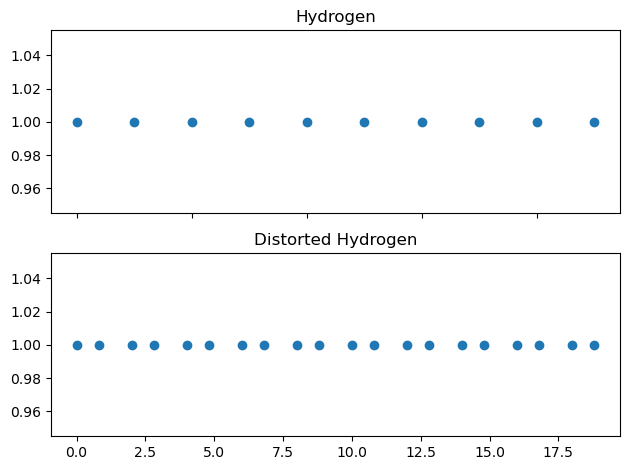

In [54]:
n = 10
test_labels = labels(n, 'h')
x_axis0 = [label_to_r(label, 'h') for label in test_labels]
test_labels = labels(n, 'dh')
x_axis1 = [label_to_r(label, 'dh') for label in test_labels]
fig, axs = plt.subplots(2, 1)
axs[0].scatter(x_axis0, np.ones(n))
axs[0].set_title("Hydrogen")
axs[0].set_xticklabels([])
axs[1].scatter(x_axis1, np.ones(2*n))
axs[1].set_title("Distorted Hydrogen")
fig.tight_layout()
plt.show()

### Graphene Testing

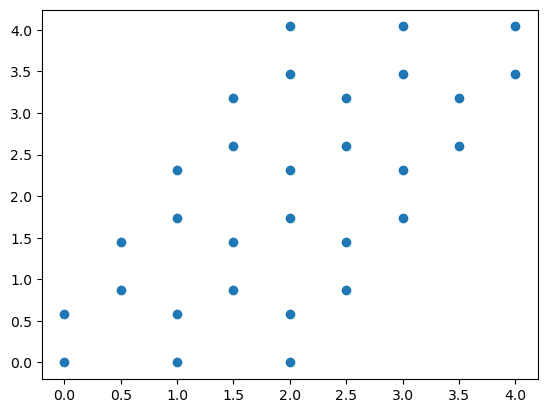

In [5]:
test_labels = labels((3, 5), 'g')
points = [label_to_r(label, 'g') for label in test_labels]
x_axis = [point[0] for point in points]
y_axis = [point[1] for point in points]
plt.figure()
plt.scatter(x_axis, y_axis)
plt.show()

In [43]:
shape = (3, 4)
point = ((2, 3), 'a')
print(labels(shape, 'g'))
print(f"Index of {point} = {label_to_index([point, shape], 'g')}")

[((0, 0), 'a'), ((0, 0), 'b'), ((0, 1), 'a'), ((0, 1), 'b'), ((0, 2), 'a'), ((0, 2), 'b'), ((0, 3), 'a'), ((0, 3), 'b'), ((1, 0), 'a'), ((1, 0), 'b'), ((1, 1), 'a'), ((1, 1), 'b'), ((1, 2), 'a'), ((1, 2), 'b'), ((1, 3), 'a'), ((1, 3), 'b'), ((2, 0), 'a'), ((2, 0), 'b'), ((2, 1), 'a'), ((2, 1), 'b'), ((2, 2), 'a'), ((2, 2), 'b'), ((2, 3), 'a'), ((2, 3), 'b')]
Index of ((2, 3), 'a') = 22


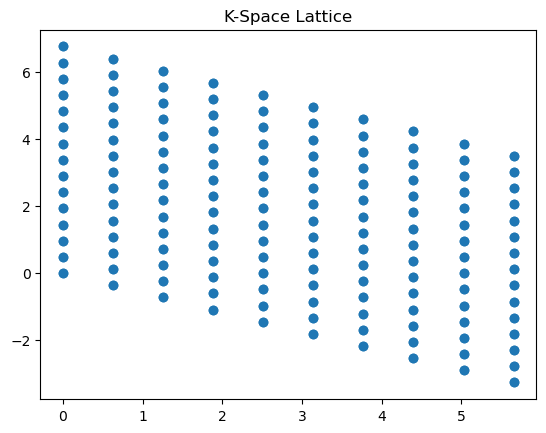

In [74]:
shape = (10, 15)
test_labels = momentum_labels(shape, 'g')
test_k = [momentum_label_to_k([label, shape], 'g') for label in test_labels]
x_axis = [point[0] for point in test_k]
y_axis = [point[1] for point in test_k]
plt.figure()
plt.scatter(x_axis, y_axis)
plt.title("K-Space Lattice")
plt.show()

In [77]:
shape = (3, 4)
point = ((2, 3), 'a')
print(momentum_labels(shape, 'g'))
print(f"Index of {point} = {momentum_label_to_index([point, shape], 'g')}")

[((0, 0), 'a'), ((0, 0), 'b'), ((0, 1), 'a'), ((0, 1), 'b'), ((0, 2), 'a'), ((0, 2), 'b'), ((0, 3), 'a'), ((0, 3), 'b'), ((1, 0), 'a'), ((1, 0), 'b'), ((1, 1), 'a'), ((1, 1), 'b'), ((1, 2), 'a'), ((1, 2), 'b'), ((1, 3), 'a'), ((1, 3), 'b'), ((2, 0), 'a'), ((2, 0), 'b'), ((2, 1), 'a'), ((2, 1), 'b'), ((2, 2), 'a'), ((2, 2), 'b'), ((2, 3), 'a'), ((2, 3), 'b')]
Index of ((2, 3), 'a') = 22


# Page 2

## Functions

In [100]:
def up(i, n):
    if i == (n-1):
        return 0
    return i + 1

def down(i, n):
    if i == 0:
        return n-1
    return i-1

def flip(label):
    if label[1] == 'a':
        return (label[0], 'b')
    return (label[0], 'a')

def clean_matrix(mat, val=10**-15, complex_magnitude=False):
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            if abs(mat[i, j]) < val:
                mat[i, j] = 0
    if complex_magnitude:
        return abs(mat)
    return mat

def find_neighbors(index, atom_type, n):
    label = index_to_label(index, atom_type, shape=n)
    N = {'h' : n, 'dh' : 2*n, 'g' : 2*np.prod(n)}[atom_type]
    if atom_type == 'h':
        return np.array([-1 if i in [up(index, n), down(index, n)] else 0 for i in range(n)])
    elif atom_type == 'dh':
        if label[1] == 'a':
            return np.array([-0.1 if i == down(index, N) else -1 if i == up(index, N) else 0 for i in range(N)])
        elif label[1] == 'b':
            return np.array([-1 if i == down(index, N) else -0.1 if i == up(index, N) else 0 for i in range(N)])
    elif atom_type == 'g':
        pair = flip(label)
        l0, l1 = label[0]
        if label[1] == 'a':
            pt1 = ((l0, down(l1, n[1])), 'b')
            pt2 = ((up(l0, n[0]), down(l1, n[1])), 'b')
        else:
            pt1 = ((down(l0, n[0]), up(l1, n[1])), 'a')
            pt2 = ((l0, up(l1, n[1])), 'a')
        pts = [label_to_index(i, 'g', n) for i in [pair, pt1, pt2]]
        return np.array([-1 if i in pts else 0 for i in range(N)])

def hamiltonian_generator(n, atom_type):
    N = {'h' : n, 'dh' : 2*n, 'g' : 2*np.prod(n)}[atom_type]
    return np.asmatrix([find_neighbors(i, atom_type, n) for i in range(N)])

def fourier_matrix(n, atom_type, shape=None):
    N = {'h' : n, 'dh' : 2*n, 'g' : 2*np.prod(n)}[atom_type]
    if atom_type == 'h':
        r_vec = [index_to_r(i, atom_type, N) for i in np.arange(0, N)]
        k_vec = [momentum_index_to_k(i, atom_type, N) for i in np.arange(0, N)]
        to_return = np.outer(k_vec, r_vec)
        return np.asmatrix((1/np.sqrt(N))*np.exp(1.j*to_return))
    elif atom_type == 'dh':
        r_vec = np.array([index_to_r(i, atom_type, N) for i in np.arange(0, N)])
        k_vec = np.array([momentum_index_to_k(i, atom_type, N) for i in np.arange(0, N)])
        to_return = np.outer(k_vec, r_vec)
        deltas = np.indices((N, N)).sum(axis=0) % 2 * -1 + 1
        return np.asmatrix((1/np.sqrt(n))*np.exp(1.j*to_return) * deltas)

In [122]:
N = 10
atom_type = 'dh'
k_vec = np.array([momentum_index_to_k(i, atom_type, N) for i in np.arange(0, N)])
print(k_vec)

[[0.        ]
 [0.        ]
 [0.62831853]
 [0.62831853]
 [1.25663706]
 [1.25663706]
 [1.88495559]
 [1.88495559]
 [2.51327412]
 [2.51327412]]


In [117]:
n = 3
atom_type = 'h'
F = fourier_matrix(n, atom_type)
print(F)

atom_type = 'dh'
F = fourier_matrix(n, atom_type)[::2, ::2]
print(F)

[[ 0.57735027+0.j   0.57735027+0.j   0.57735027+0.j ]
 [ 0.57735027+0.j  -0.28867513+0.5j -0.28867513-0.5j]
 [ 0.57735027+0.j  -0.28867513-0.5j -0.28867513+0.5j]]
[[ 0.57735027+0.j   0.57735027+0.j   0.57735027+0.j ]
 [ 0.57735027+0.j  -0.28867513+0.5j -0.28867513-0.5j]
 [ 0.57735027+0.j  -0.28867513-0.5j -0.28867513+0.5j]]


<Figure size 640x480 with 0 Axes>

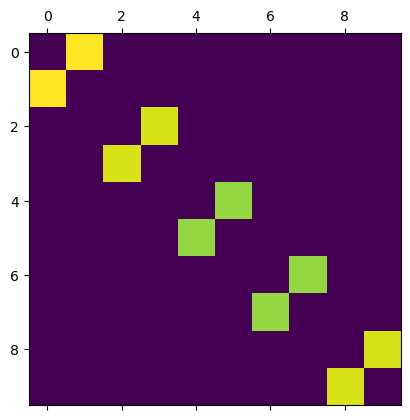

[[0.  1.1]
 [1.1 0. ]]
[[0.         1.03527938]
 [1.03527938 0.        ]]
[[0.        0.9209759]
 [0.9209759 0.       ]]
[[0.        0.9209759]
 [0.9209759 0.       ]]
[[0.         1.03527938]
 [1.03527938 0.        ]]


In [126]:
n = 5
atom_type = 'dh'
F = fourier_matrix(n, atom_type)
Hammy = hamiltonian_generator(n, atom_type)
H_k = np.abs(clean_matrix(F@Hammy@F.H))
plt.figure()
plt.matshow(H_k)
plt.show()
Es = []
for i in range(int(len(H_k)/2)):
    i1, i2 = 2*i, 2*i + 2
    block = H_k[i1:i2,i1:i2]
    print(block)
    eigs, vecs = np.linalg.eigh(block)
    Es.append(eigs)

# plt.figure()
# plt.matshow(H_k.H)
# plt.show()

In [11]:
print(hamiltonian_generator(7, 'h'))
print(hamiltonian_generator(3, 'dh'))
print(hamiltonian_generator((2, 2), 'g'))

[[ 0 -1  0  0  0  0 -1]
 [-1  0 -1  0  0  0  0]
 [ 0 -1  0 -1  0  0  0]
 [ 0  0 -1  0 -1  0  0]
 [ 0  0  0 -1  0 -1  0]
 [ 0  0  0  0 -1  0 -1]
 [-1  0  0  0  0 -1  0]]
[[ 0.  -1.   0.   0.   0.  -0.1]
 [-1.   0.  -0.1  0.   0.   0. ]
 [ 0.  -0.1  0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -0.1  0. ]
 [ 0.   0.   0.  -0.1  0.  -1. ]
 [-0.1  0.   0.   0.  -1.   0. ]]
[[ 0 -1  0 -1  0  0  0 -1]
 [-1  0 -1  0  0  0 -1  0]
 [ 0 -1  0 -1  0 -1  0  0]
 [-1  0 -1  0 -1  0  0  0]
 [ 0  0  0 -1  0 -1  0 -1]
 [ 0  0 -1  0 -1  0 -1  0]
 [ 0 -1  0  0  0 -1  0 -1]
 [-1  0  0  0 -1  0 -1  0]]


## Testing

12

## Grading